#14MBID TFM

#Máster Oficial en Big Data y Data Science
#Limpieza de documentos escaneados para traducción automática usando ML
#Alumno/a: Jackeline León Zárate
#Director/a de TFM: Cristina Caro González




#Instalar librerías

In [ ]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive
!pip install cartopy
import cartopy
!apt-get -qq install -y graphviz && pip install pydot
import pydot
!apt-get -qq install -y libfluidsynth1
!sudo apt-get install tesseract-ocr


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
E: Package 'libfluidsynth1' has no installation candidate
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
# Se importan las librerias a utilizar
import pandas as pd
import numpy as np
import os
import zipfile
import cv2
import matplotlib.pyplot as plt
%matplotlib inline



In [ ]:
!pip install --upgrade opencv-python
!pip install pytesseract
!pip install googletrans==4.0.0-rc1

import pytesseract

from PIL import Image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pytesseract
from googletrans import Translator

translator = Translator()


In [ ]:

!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
!apt-get update
!apt-get install -y enchant
!pip install pyenchant
import enchant
import os
import string


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:5 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:8 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
enchant is already the newest version (1.6.0-11.3build1).
0 upgraded, 0 newly installed, 0 to remove an

## PASO 1 Lectura de dataset

In [ ]:
#Lectura del dataset

from google.colab import files
uploaded = files.upload()

Saving Datos.zip to Datos (1).zip


In [ ]:
#!pwd

/content


#Descomprimir archivos de zip cargado

In [ ]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['Datos.zip']),'r')
data.extractall()

##PASO 2 Función para preprocesado de las imágenes

##PASO 3 transformación de datos tipo imagen a texto

In [ ]:
def PreprocesadoImagen(img):
    # Preprocesado de las imagenes

# Cambia la extensión por una nueva

# Umbralización de la imagen 
  ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Erosionar la imagen para eliminar el ruido y los detalles finos
  kernel = np.ones((5,5),np.uint8)
  erosion = cv2.erode(thresh, kernel, iterations = 1)

# Dilatar la imagen para unir objetos cercanos
  dilation = cv2.dilate(erosion, kernel, iterations = 1)

# Buscar los contornos en la imagen dilatada
  contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dibujar los contornos encontrados en la imagen original
  img_contours = cv2.drawContours(img.copy(), contours, -1, (0, 255, 0), 2)


# Convierte la imagen a texto
  cv2.imwrite('filtered.jpg', img_contours) 
  text = pytesseract.image_to_string('filtered.jpg', lang='eng', config='--psm 6')

# devuelve la imagén como un texto
    
  return text


PASO 3 Función para encontrar palabras que no se encuentrán en un diccionario

In [ ]:
# Busqueda de palabras erradas

def PalabrasErradas(text):

  diccionario = enchant.Dict("en_US")
  palabras = word_tokenize(text)
# Lista de siglas conocidas
  siglas_conocidas = ["U2TP", "UML"]
  #print(ErNombreArchivo)
# Obtener una cadena de caracteres que contenga los signos de puntuación
  puntuacion = string.punctuation + "'\""+"’"+"”"+"“"+"©"+"€"+"°"
  print(puntuacion)

# Abrir un archivo en modo escritura
#with open(ErNombreArchivo, "w") as archivo: 

  for palabra in palabras:
    if any(caracter in palabra for caracter in puntuacion) and palabra not in siglas_conocidas:
            # Si la palabra contiene signos de puntuación, no verificar su ortografía o si son siglas
            continue
    elif not diccionario.check(palabra):
       print("La palabra '{}' está mal escrita".format(palabra))
        #archivo.write("{}\n".format(palabra))

  return palabra


In [ ]:
#import cv2
import glob
nueva_extension = '.txt'
# Leer las imágenes
path = "/content/Datos/*.*"
files = glob.glob(path)

for index, file in enumerate(files):
    img = cv2.imread(file)
    print(f"Imagen {index}: {file}")

 

Imagen 0: /content/Datos/One_Hundred_Years_of_Solitude.png
Imagen 1: /content/Datos/A_lightweight_security_protocol_for_NFC.png
Imagen 2: /content/Datos/Link_Prediction_Based_on_Common-Neighbors.png
Imagen 3: /content/Datos/Toninght_I_Can_Write_Saddest_Lines.png
Imagen 4: /content/Datos/García_Márquez.png
Imagen 5: /content/Datos/Mode_Driven_testing.png
Imagen 6: /content/Datos/Only_learning_matters.png
Imagen 7: /content/Datos/Service_Innovation_Drivers.png
Imagen 8: /content/Datos/The_Vehicular_Location_Privacy_Zone.png
Imagen 9: /content/Datos/Related_Work.png


## Proceso principal
#1. Lee las imagenes cargadas
#2. Limpia las imagenes
#3. Transforma en texto la imagenes
#4. Genera salida de archvios
*   archivo en Inglés
*   archivo con palabras erradas
*   archivo en español

In [ ]:
#Proceso principal

import glob
nueva_extension = '.txt'
# Leer las imágenes
path = "/content/Datos/*.*"
files = glob.glob(path)

for index, file in enumerate(files):
    img = cv2.imread(file,0)
    print(f"Imagen {index}: {file}")
 
   # Asigna el nombre del archivo a la variable para procesarlo
    nombre_archivo = os.path.basename(file)
    

    EnNombreArchivo = 'En'+nombre_archivo + nueva_extension
    EsNombreArchivo = 'Es'+nombre_archivo + nueva_extension
    ErNombreArchivo = 'Er'+nombre_archivo + nueva_extension

    print('-------------------------------------------------------------------------------')
    print(EnNombreArchivo)
    #llama a función que procesa la imagen
    text_transformado = PreprocesadoImagen(img)

  

    # Guardar imagen procesada en inglés
    with open(EnNombreArchivo, "w") as archivo:  
      print(text_transformado)
      archivo.write("{}\n".format(text_transformado))

    #llama a función que encuentra palabras erradas
    text_erradas = PalabrasErradas(text_transformado)
    with open(ErNombreArchivo, "w") as archivo: 
      print(text_erradas)
      archivo.write("{}\n".format(text_erradas))
    #PreprocesadoImagen(text)

    text = text_transformado
    translation = translator.translate(text, dest='es')
    
    # Guardar imagen procesada en español
    with open(EsNombreArchivo, "w") as archivo: 
      print(translation.text)
      archivo.write("{}\n".format(translation.text))
  





Imagen 0: /content/Datos/One_Hundred_Years_of_Solitude.png
-------------------------------------------------------------------------------
EnOne_Hundred_Years_of_Solitude.png.txt
José Arcadio Buendia believes Macondo to be surrounded by water, anion that island, he invents the world according to his
perceptions. !°] Sooft after its foundation, Macondo becomes a town frequented by unusual and extraordinary events that involve the
erations of the Buendia family, who are unable or unwifag to escape their periodic (mostly self-inflicted) misfortunes. For years the n
Cooteany and unconnected to the outside world, with the exception of the annual visit of a band of gypsies, who show theets#nspeop|
scientific discoveries such as magnets, telescopes, and ice. The leader of the gypsies, a man named Melquifdes, maintains a clo:
friendship with José Arcadio, who becomes increasingly withdrawn ,=a8essed with investigating the mysteries of the universe presented to
him by the gypsies. Ultimately he

El código que se encuentra a continuación son diversas pruebas que se hicieron antes de lograr el desarrollo

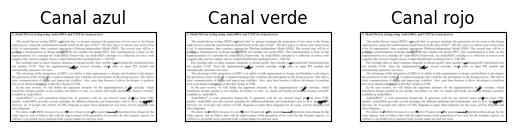

In [ ]:
# No ejecutar es una prueba para separar los colores
# Separa los canales de la imagen  # Prueba no lo estoy útilizando
b, g, r = cv2.split(img)

# Muestra los canales de la imagen usando la función imshow de matplotlib
plt.subplot(131), plt.imshow(b, cmap='gray')
plt.title('Canal azul'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(g, cmap='gray')
plt.title('Canal verde'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(r, cmap='gray')
plt.title('Canal rojo'), plt.xticks([]), plt.yticks([])
plt.show()


In [ ]:
# Prueba1 
# 1. Cargar la imagen en modo escala de grises
gray_img = cv2.imread('Mode_Driven_testing.png', cv2.IMREAD_GRAYSCALE)
#print(gray_img)
# Aplicar un filtro de mediana
filtered = cv2.medianBlur(gray_img, 5)
text = pytesseract.image_to_string(gray_img, lang='eng')
print(text)




3. Model Driven testing using AndroMDA and U2TP in scrum process

The model driven testing (MDT) apyroach that we present automate the generation of test cases at the Scrum
agile process, using the transformation model based on the idea of Dai’. The first step is to choose user stories from
a list of requirements, then construct appropriate Platform-Independent Model (PIM). The second step will be to
=peefsmim-a transformation of design (PIM) into another test model (PIT). This transformation is done via the
implementation of a cartridge for AndroMDA Framework. An AndroMDA cartridge is a collection of source code
template files and Java helper classes (called Metafagades) packaged into a JAR file.

The cartridge takes as input sequence diagrams as design model, these models arggutomatically transformed into
test models U2TP. Then the implementati Lg second cartridge whigh takes as input PIT models and
automatically generates test cases.

The advantage of the integration of MDT is its a

In [ ]:
# Prueba2
#2. Cargar la imagen en modo escala de grises

gray_img = cv2.imread('Mode_Driven_testing.png', cv2.IMREAD_GRAYSCALE)

#filtro de mediana
filtered1 = cv2.medianBlur(gray_img, 3)
filtered2 = cv2.medianBlur(gray_img, 7)
filtered3 = cv2.medianBlur(gray_img, 11)
filtered = (filtered1 + filtered2 + filtered3) / 3

cv2.imwrite('filtered.jpg', filtered)
#Aplica el reconocimiento óptico de caracteres (OCR) utilizando pytesseract:
text = pytesseract.image_to_string('filtered.jpg', lang='eng', config='--psm 6')
print(text)

3, Media| Driven testing aviag AndreM DA oad U21TP im scram pracess

The model driven testing (MDT) agggproach that we present automate the generation of test cases at the Scrum
agile process, using the transformation model based on the idea of Dai’. The first step 1s to choose user stones from
a hist of requirements, then construct appropriate Platform Independent Model (PIM). The second step will be to
get@aea transformation of design mederiM) wo another test model (PIT). This transformation is done via the
nnplementation of a carindge for AndroMDA Framework. An AndroMDA cartridge is a collection of source code
template files and Java helper classes (called Metafagades) packaged into a JAR file

The cartridge takes as mput sequence diagrams as design model, these models anggeutomatically transformed mto
test models U2TP. Then the eer second carirdge whigh fakes as input PIT models and
automatically generates test cases

‘The advaniage of the tegration of MDT 1s its ability to link re

In [ ]:
#Pruebas de traducción
translation = translator.translate(text, dest='es')
with open(EsNombreArchivo, "w") as archivo: 
  print(translation.text)
  archivo.write("{}\n".format(translation.text))


Esta noche puedo escribir las líneas más tristes.
Escribir, por ejemplo.'La noche está destrozada
y las estrellas de Bjag temblar en el distaygse ~
El viento de la noche gira en el cielo y canta.
Esta noche puedo escribir las líneas más tristes.
La hizo, y a veces ella amaba a ete
A través de noches como esta la sostuve en mis brazos
La pasó una y otra vez debajo del cielo interminable.

A veces me amaba, y yo también la amaba.

Low podría que uno no haya amado su AF € en los ojos fijos.
Esta noche puedo escribir las líneas más tristes.
Para tu ghat no tengo heg2iissfeel que la haya perdido.
A la noche inmensa, aún más inmensa ee
Un versiones de Affills to the Soul como Dew al pasado.
¿Qué fos importa que mi amor no pueda mantenerla?
La noche está destrozada y no conmigo.
Esto es todo.A lo lejos alguien canta.En la distancia
Mi sould. No satisfecho de que la haya perdido.
Mi vista la busca como si fuera a ella.
Mi corazón la busca y ella no está conmigo.
La misma noche blanqueando los 

In [ ]:
# prueba3
# Cargar imagen
img=cv2.imread('Mode_Driven_testing.png')

# Convertir a escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)

# Aplicar filtro de desenfoque
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Aplicar filtro de umbralización
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
thresh2 = cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB)
# Aplicar filtro de erosión
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(thresh, kernel, iterations = 1)
erosion2 = cv2.cvtColor(erosion, cv2.COLOR_BGR2RGB)

# Aplicar filtro de dilatación
dilation = cv2.dilate(erosion, kernel, iterations = 1)
dilation2 = cv2.cvtColor(dilation, cv2.COLOR_BGR2RGB)

#  Guardar imagen procesada
cv2.imwrite('filtered.jpg', dilation)
text = pytesseract.image_to_string('filtered.jpg', lang='eng', config='--psm 6')
print(text)


3. Medel Driven testing using AndroMDA and U2TP is scrum precess

The model driven testing (MDT) aggroach that we present automate the generation of test cases at the Scrum
agile process, using the transformation model based on the idea of Dai. The first step is to choose user stones from
a list of requirements. then construct uate Platform-Independent Model (PIM). The second step will be to
pevlliga.a transformation of design magi into another test model (PIT). This transformation is done via the
implementation of a cartridge for AndroMDA Framework. An AndroMDA cartridge is a collection of source code
template files and Java helper classes (called Metafacades) packaged into a JAR file.

The cartndge takes as input sequence diagrams as design model. these models arggutonsatically transformed into
test models U2TP. Then the unplementariong@iya second cartridge whigh takes ex input PIT models and
automatically generates test cases.

The advantage of the imegration of MDT is its ability t

In [ ]:
# prueba4
# Cargar imagen
#img = cv2.imread('imagen.jpg')
img=cv2.imread('Mode_Driven_testing.png')
#img.save('Mode_Driven_testing.png', 'JPG')

# Convertir a escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Aplicar filtro de desenfoque
blur = cv2.GaussianBlur(gray, (9, 9), 0)

# Aplicar filtro de umbralización
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Aplicar filtro de erosión
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(thresh, kernel, iterations = 1)

# Aplicar filtro de dilatación
dilation = cv2.dilate(erosion, kernel, iterations = 1)

# Guardar imagen procesada
cv2.imwrite('filtered.jpg', dilation)

text = pytesseract.image_to_string('filtered.jpg', lang='eng', config='--psm 6')
print(text)

3. Madel Briven toting ecing AndrehDA end UIT? ip coram presen

The model derewe wanng (MDT) eggevech tast we povnest sutvauste the peaeseen of tent cones of the Scrum
opalt pees, uneng the Gapeieemese meted beard oo the nto of Der? The fire! step om to cieeeoy Gee cto feeee
0 het of equeweem, thee comet Pistieem-lndepeadent bedel (PD). The ssonnd cup wall br
Petia nate of Spe mea a st dl PT Ten sennieenen = duet vis the
unplomemesa of a cunenips tex Premecewsk. Aa AadebEDA comedpr ss codlecnen of seusee code
template files end Jews hebpe clea Graded hbanelopedon) pocinged atm o JAR fie

ree Te lnntde eden ng a cd cui deg the oe ena et ood a
wot ede UITP. Then tht mplomcnneggil» woned eunnipe wingh = mpet PIT medeh ond
eutemsteelly genensies tout coms.

The edvamtape of the of MEDT ws ote chalety to lnk requests we demgpn. aed focistete we develepers
ee fn ee ee
cs commen of end mapeeving workflow. Also. gue tums become & alleen devlepes w purfen
tents mn on pdeeteeed lengyings te thet

In [ ]:
#5
#import cv2
#from google.colab.patches import cv2_imshow

# Cargar la imagen
#image = cv2.imread('imagen.jpg', 0)
img=cv2.imread('Mode_Driven_testing.png')

# Aplicar filtro de reducción de ruido
#image_filtered = cv2.fastNlMeansDenoising(image, None, 10, 7, 21)
img_filtered = cv2.fastNlMeansDenoising(img, None, 10, 7, 21)

# Aplicar umbralización
threshold_value, threshold_img = cv2.threshold(img_filtered, 100, 255, cv2.THRESH_BINARY)

# Definir el kernel
kernel = np.ones((3,3), np.uint8)

# Aplicar erosión
erosion = cv2.erode(threshold_img, kernel, iterations = 1)

# Aplicar dilatación
dilation = cv2.dilate(threshold_img, kernel, iterations = 1)

# Contraer la imagen luego de dilatarla
erosion2  = cv2.erode(dilation, kernel, iterations = 1)

# Aplicar dilatación
dilation2 = cv2.dilate(erosion2, kernel, iterations = 1)

# Mostrar la imagen original y la imagen con el filtro aplicado
#cv2_imshow(img)
#cv2_imshow(img_filtered)
#cv2_imshow(threshold_img)

# Guardar imagen procesada
#cv2.imwrite('filtered.jpg', erosion2) #resultado malo
#cv2.imwrite('filtered.jpg', img_filtered) #resultado bastante aceptable
cv2.imwrite('filtered.jpg', threshold_img) #resultado bastante aceptable
#cv2.imwrite('filtered.jpg', erosion2) #resultado malo
#cv2.imwrite('filtered.jpg', dilation2)#resultado malo
text = pytesseract.image_to_string('filtered.jpg', lang='eng', config='--psm 6')
print(text)


3. Model Driven testing using AndroMDA and U2TP in serum process

The model driven testing (MDT) aprroach that we present automate the generation of test cases at the Scrum
agile process. using the transformation model based on the idea of Dai~’. The first step is to choose user stories from
a list of requirements. then construct appropriate Platform-Independent Model (PIM). The second step will be to
perfm a transformation of design med .: (PIM) into another test model (PIT). This transformation is done via the
unplementation of a cartridge for AndroMDA Framework. An AndroMDA cartridge is a collection of source code
template files and Java helper classes (called Metafacades) packaged into a JAR file.

The cartridge takes as input sequence diagrams as design model, these models arggutomatically transformed into
test models U2TP. Then the unplementationgg# a second cartridge whigh takes as input PIT models and
automatically generates test cases.

The advantage of the integration of MDT 

In [ ]:
import zipfile
import os

zip_name = 'archivos.zip'
folder_path = '/content/' # Coloca la ruta de la carpeta donde están los archivos que deseas descargar

with zipfile.ZipFile(zip_name, 'w', zipfile.ZIP_DEFLATED) as zipf:
  for root, dirs, files in os.walk(folder_path):
   for file in files:
      zipf.write(os.path.join(root, file))


In [ ]:
from google.colab import files
files.download(zip_name)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#!python -m spacy download es_core_news_sm
#!python -m spacy download en_core_web_md
!python -m spacy download en_core_web_lg


/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-04-02 04:56:59.284712: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-02 04:57:01.792779: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_lg-3.5.0/en_core_web_lg-3.5.0-py3-none-any.whl (587.7 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
import spacy

#nlp = spacy.load("es_core_news_sm")
#nlp = spacy.load('en_core_web_md')
nlp = spacy.load('en_core_web_lg')


def find_replace_word(text, wrong_word):
    doc = nlp(text)
    replace_word = ""
    
    for token in doc:
        if token.is_alpha and not token.is_stop:
            similarity = token.similarity(nlp(wrong_word))
            if similarity > 0.7:
                replace_word = token.text.lower()
                break
    return replace_word
   


In [ ]:
#5
diccionario = enchant.Dict("en_US")
#print(text)
text='New Straty Chnge'
palabras = word_tokenize(text)
for palabra in palabras:
    if not diccionario.check(palabra):
       print("La palabra '{}' está mal escrita".format(palabra))
       replace_word = find_replace_word(text, palabra)
       print(texto_listo)
if replace_word != "":
    corrected_text = text.replace(palabra, replace_word)
    print(corrected_text)
else:
    print("No se encontró una palabra para reemplazar.") 



La palabra 'Straty' está mal escrita


NameError: ignored

In [ ]:
import gensim.downloader as api
import re

# Cargar el modelo pre-entrenado de Google
model = api.load('word2vec-google-news-300')

# Leer el texto
texto = "This is an exampel of a text with some wrng words in it."

# Identificar las palabras erróneas
palabras_erroneas = re.findall(r'\b\w*wrng\w*\b', texto)

# Reemplazar las palabras erróneas con las palabras sugeridas
for palabra_erronea in palabras_erroneas:
    sugerencias = model.most_similar(palabra_erronea)
    if sugerencias:
        mejor_sugerencia = sugerencias[0][0]
        texto = texto.replace(palabra_erronea, mejor_sugerencia)

# Imprimir el texto corregido
print(texto)


[=================---------------------------------] 34.9% 579.9/1662.8MB downloaded

In [ ]:
#5
!pip install -U spacy
!python -m spacy download es_core_news_sm
import spacy

nlp = spacy.load('es_core_news_sm')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-30 20:35:58.367246: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-03-30 20:36:01.581734: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 33.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [ ]:
import spacy
from spacy.tokens import Token

In [ ]:
#5
texto = (text)

doc = nlp(texto)

texto_corregido = ""

for token in doc:
   if token.is_alpha and not token.is_stop:
       texto_corregido += token._.suggestions[0].lower() if len(token._.suggestions) > 0 else token.text.lower()
  else:
      texto_corregido += token.text

print(texto_corregido)
#---------------------------------












IndentationError: ignored

In [ ]:
import spacy

nlp = spacy.load("es_core_news_sm")

def generate_corrections(text):
    doc = nlp(text)
    corrected_text = ""
    
    for token in doc:
        if token.is_alpha and not token.is_stop:
            suggestions = []
            for suggestion in token._.suggestions:
                suggestions.append(suggestion.lower())
            if len(suggestions) > 0:
                corrected_text += suggestions[0] + " "
            else:
                corrected_text += token.text.lower() + " "
        else:
            corrected_text += token.text + " "
    
    return corrected_text.strip()
    
#text = "Este es un texto con errore de ortografía."
corrected_text = generate_corrections(text)

print(corrected_text)


3 . suggestion1 suggestion1 suggestion1 suggestion1 suggestion1 suggestion1 U2TP suggestion1 suggestion1 suggestion1 

 suggestion1 suggestion1 suggestion1 suggestion1 ( suggestion1 ) suggestion1 suggestion1 suggestion1 suggestion1 suggestion1 suggestion1 suggestion1 suggestion1 suggestion1 suggestion1 suggestion1 suggestion1 suggestion1 
 suggestion1 suggestion1 , suggestion1 suggestion1 suggestion1 suggestion1 suggestion1 suggestion1 suggestion1 suggestion1 suggestion1 suggestion1 . suggestion1 suggestion1 suggestion1 suggestion1 suggestion1 suggestion1 suggestion1 suggestion1 suggestion1 
 a suggestion1 suggestion1 suggestion1 . suggestion1 suggestion1 suggestion1 Platform-Independent suggestion1 ( suggestion1 ) . suggestion1 suggestion1 suggestion1 suggestion1 suggestion1 suggestion1 
 pevlliga.a suggestion1 suggestion1 suggestion1 suggestion1 suggestion1 suggestion1 suggestion1 suggestion1 ( suggestion1 ) . suggestion1 suggestion1 suggestion1 suggestion1 suggestion1 suggestion1 
 

In [ ]:
print(text)

3. Medel Driven testing using AndroMDA and U2TP is scrum precess

The model driven testing (MDT) aggroach that we present automate the generation of test cases at the Scrum
agile process, using the transformation model based on the idea of Dai. The first step is to choose user stones from
a list of requirements. then construct uate Platform-Independent Model (PIM). The second step will be to
pevlliga.a transformation of design magi into another test model (PIT). This transformation is done via the
implementation of a cartridge for AndroMDA Framework. An AndroMDA cartridge is a collection of source code
template files and Java helper classes (called Metafacades) packaged into a JAR file.

The cartndge takes as input sequence diagrams as design model. these models arggutonsatically transformed into
test models U2TP. Then the unplementariong@iya second cartridge whigh takes ex input PIT models and
automatically generates test cases.

The advantage of the imegration of MDT is its ability t

In [ ]:
#!python3 -m venv myenv
!pip install virtualenv



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 36.4 MB/s eta 0:00:00


In [ ]:
#!source myenv/bin/activate
!mkdir mi_entorno_virtual
%cd mi_entorno_virtual


/content/mi_entorno_virtual


In [ ]:
!virtualenv mi_entorno_virtual



created virtual environment CPython3.9.16.final.0-64 in 1600ms
  creator CPython3Posix(dest=/content/mi_entorno_virtual/mi_entorno_virtual, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==23.0.1, setuptools==67.4.0, wheel==0.38.4
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [ ]:
!source mi_entorno_virtual/bin/activate


In [ ]:
!pip install numpy nltk gensim pyemd



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#!pip install -U setuptools
!pip install pycontractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pycontractions-2.0.1-py3-none-any.whl (9.6 kB)
  Using cached language-check-1.1.tar.gz (33 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for language-check
  Running setup.py clean for language-check
Failed to build language-check
  error: subprocess-exited-with-error
  
  × Running setup.py install for language-check did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Running setup.py install for language-check ... error
error: legacy-install-failure

× Encountered error while trying to install package.


In [ ]:
import pycontractions

ModuleNotFoundError: ignored

In [ ]:
#5a corregír texto
#descactivar entorno virtual
!deactivate

#cont = pycontractions.Contractions()


/bin/bash: deactivate: command not found


In [ ]:
!python --version


Python 3.9.16


In [ ]:
import os
os.environ['PYTHONPATH'] = 'myenv/lib/python3.9.16/site-packages'


In [ ]:
#5a
texto_corregido = list(cont.expand_texts([texto], precise=True))[0]
print(texto_corregido)


NameError: ignored

In [ ]:
#5
sinonimos = set()
for syn in wordnet.synsets(palabra):
    for lemma in syn.lemmas():
        sinonimos.add(lemma.name())


In [ ]:
#5
lematizador = WordNetLemmatizer()
forma_base = lematizador.lemmatize(palabra)


In [ ]:
#5
for palabra in palabras:
    if palabra == palabras:
        for s in sinonimos:
            if lematizador.lemmatize(s) == forma_base:
                texto = texto.replace(palabra, s)
                break
